In [45]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [46]:
#Loading dataset
data=pd.read_csv("Cars-clean.csv")

In [47]:
data.head()

,S.No.,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Wagon R LXI CNG,wagon,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai,Creta 1.6 CRDi SX Option,creta,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda,Jazz V,jazz,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti,Ertiga VDI,ertiga,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi,A4 New 2.0 TDI Multitronic,a4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Brand              6019 non-null   object 
 2   Class              6019 non-null   object 
 3   Model              6019 non-null   object 
 4   Name               6019 non-null   object 
 5   Location           6019 non-null   object 
 6   Year               6019 non-null   int64  
 7   Kilometers_Driven  6019 non-null   int64  
 8   Fuel_Type          6019 non-null   object 
 9   Transmission       6019 non-null   object 
 10  Owner_Type         6019 non-null   object 
 11  Mileage            6019 non-null   float64
 12  Engine             6019 non-null   float64
 13  Power              6019 non-null   float64
 14  Seats              6019 non-null   float64
 15  Price              6019 non-null   float64
dtypes: float64(5), int64(3),

In [49]:
# categorical column should be converted to categorical type 

data['Location']=data.Location.astype('category')
data['Fuel_Type']=data.Fuel_Type.astype('category')
data['Transmission']=data.Transmission.astype('category')
data['Owner_Type']=data.Owner_Type.astype('category')

In [50]:
data.nunique()

S.No.                6019
Brand                  31
Class                1876
Model                 211
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               429
Engine                146
Power                 370
Seats                   8
Price                1373
dtype: int64

### Splitting data

In [51]:
# defining X and y variables
X = data.drop(["S.No.","Price","Brand","Class","Seats","Model","Name"], axis=1)
y = data[["Price"]]

print(X.head())
print(y.head())

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  
0    26.60   998.0   58.16  
1    19.67  1582.0  126.20  
2    18.20  1199.0   88.70  
3    20.77  1248.0   88.76  
4    15.20  1968.0  140.80  
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


In [52]:
# creating dummy variables
X = pd.get_dummies(X, columns=["Location","Fuel_Type", "Transmission","Owner_Type"], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [53]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)
X_train.shape, X_test.shape

((4213, 23), (1806, 23))

### Building Models

- We'll fit different models on the train data and observe their performance.
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and r_2 score to optimize the model.
- R-square - Coefficient of determination is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [54]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

### Desicion Tree Model

In [55]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [56]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  0.9999989839203466
R-square on test set :  0.7767072668445427
RMSE on training set :  0.011398388194036381
RMSE on test set :  5.149463163306184


- The Decision tree model with default parameters is overfitting the train data.

### Hyperparameter Tuning

In [57]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=13, min_samples_leaf=7, random_state=1)

In [58]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.8951737498825779
R-square on test set :  0.8540351795117609
RMSE on training set :  3.661125289183883
RMSE on test set :  4.163405961319828


- The overfitting is reduced after hyperparameter tuning and the test score.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

In [59]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.695786
Year                       0.172113
Kilometers_Driven          0.049206
Engine                     0.043020
Mileage                    0.021140
Transmission_Manual        0.012058
Fuel_Type_Diesel           0.003133
Location_Hyderabad         0.001455
Location_Coimbatore        0.001351
Location_Kolkata           0.000322
Owner_Type_Second          0.000218
Location_Pune              0.000057
Fuel_Type_Petrol           0.000048
Location_Bangalore         0.000032
Location_Delhi             0.000028
Location_Chennai           0.000014
Location_Kochi             0.000011
Location_Jaipur            0.000004
Location_Mumbai            0.000004
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Owner_Type_Fourth & Above  0.000000
Owner_Type_Third           0.000000


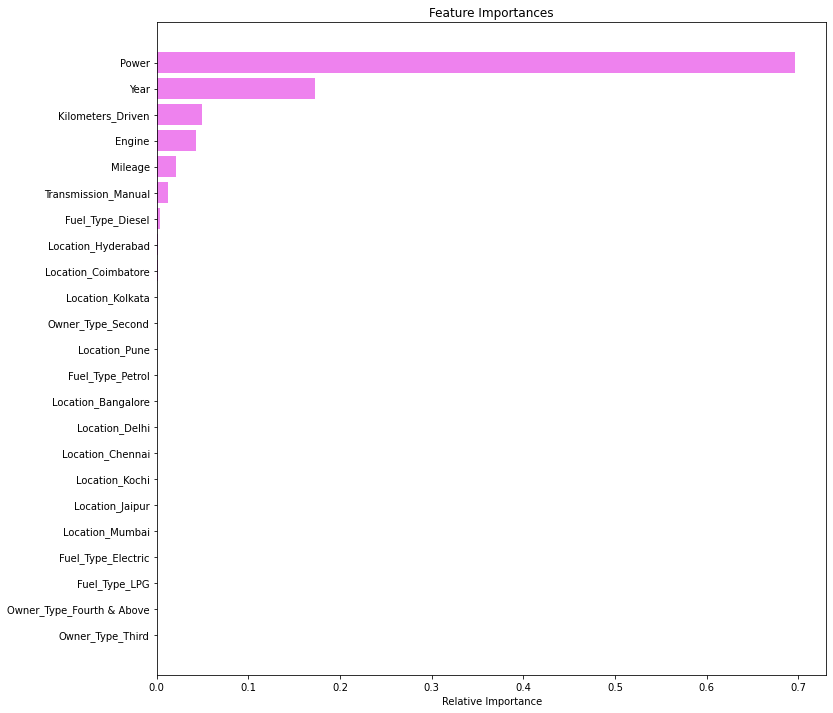

In [60]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest Model

In [61]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [62]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9809156000294721
R-square on test set :  0.9215685580070706
RMSE on training set :  1.5621359285909855
RMSE on test set :  3.051896216686079


- Random forest is giving a good r2 score of 92% on the test data but it is slightly overfitting the train data.
- Let's try to reduce this overfitting by hyperparameter tuning.

In [63]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=120, random_state=1)

In [64]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9802097906947388
R-square on test set :  0.9071828074883196
RMSE on training set :  1.5907603584475036
RMSE on test set :  3.3200060486738785


- No improvment from the non tunned.

In [65]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.322998
Engine                     0.171858
Transmission_Manual        0.123456
Year                       0.106050
Kilometers_Driven          0.089926
Mileage                    0.081204
Fuel_Type_Diesel           0.026909
Fuel_Type_Petrol           0.021443
Location_Coimbatore        0.010835
Location_Hyderabad         0.008560
Owner_Type_Second          0.005743
Location_Mumbai            0.005032
Location_Bangalore         0.004809
Location_Kolkata           0.004788
Location_Kochi             0.003805
Location_Delhi             0.003756
Location_Chennai           0.002431
Location_Pune              0.002336
Owner_Type_Third           0.002052
Location_Jaipur            0.001890
Owner_Type_Fourth & Above  0.000069
Fuel_Type_Electric         0.000046
Fuel_Type_LPG              0.000004


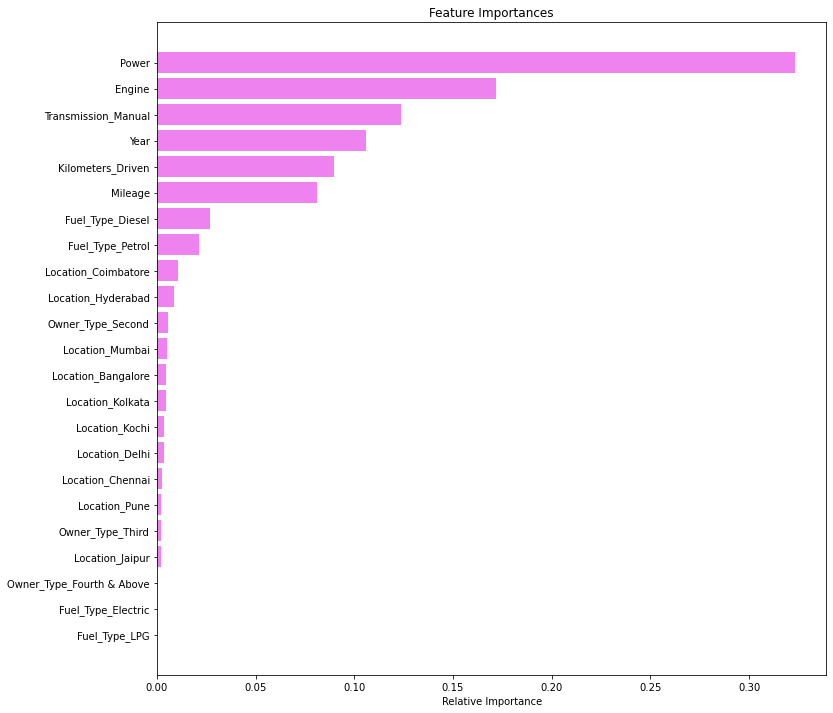

In [66]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Boosting Models

### AdaBoost Regressor

In [67]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [68]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.7807166892539048
R-square on test set :  0.7765578231594761
RMSE on training set :  5.295199852239077
RMSE on test set :  5.151186072115123


- AdaBoost is generalizing well but it is giving poor performance, in terms of r2 score as well as RMSE, as compared to the decision tree and random forest model.

### Hyperparameter Tuning

In [69]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=20, random_state=1)

In [70]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.7699439215179059
R-square on test set :  0.789669178742584
RMSE on training set :  5.423709528474043
RMSE on test set :  4.997768319414317


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [71]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.743052
Kilometers_Driven          0.097956
Year                       0.091653
Location_Hyderabad         0.056952
Engine                     0.008235
Mileage                    0.001740
Owner_Type_Third           0.000412
Location_Coimbatore        0.000000
Location_Delhi             0.000000
Location_Chennai           0.000000
Location_Jaipur            0.000000
Location_Bangalore         0.000000
Location_Kolkata           0.000000
Location_Mumbai            0.000000
Location_Pune              0.000000
Fuel_Type_Diesel           0.000000
Fuel_Type_Electric         0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Petrol           0.000000
Transmission_Manual        0.000000
Owner_Type_Fourth & Above  0.000000
Owner_Type_Second          0.000000
Location_Kochi             0.000000


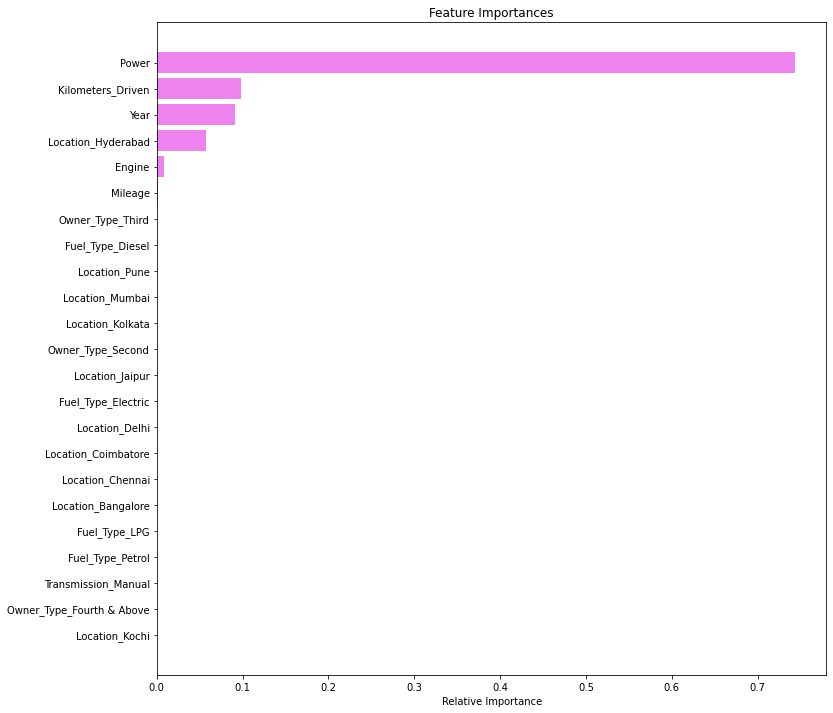

In [72]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Regressor

In [73]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [74]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.9295525101406297
R-square on test set :  0.9035787275033088
RMSE on training set :  3.001320176346426
RMSE on test set :  3.383849898738675


- Gradient boosting is generalizing well and giving good results but not as good as random forest.

### Hyperparameter Tuning

In [76]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, max_features=0.7, n_estimators=175,
                          random_state=1, subsample=0.8)

In [77]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.9882407096130139
R-square on test set :  0.9324178340502124
RMSE on training set :  1.226224880102481
RMSE on test set :  2.832961771898957


- We can see that the model has improved significantly in terms of r2 score and RMSE.

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.528422
Year                       0.166433
Engine                     0.143261
Kilometers_Driven          0.061374
Mileage                    0.039312
Transmission_Manual        0.024374
Location_Hyderabad         0.015215
Fuel_Type_Diesel           0.004561
Fuel_Type_Petrol           0.003934
Location_Coimbatore        0.002499
Location_Kochi             0.002458
Location_Bangalore         0.002251
Location_Mumbai            0.001427
Location_Kolkata           0.001092
Location_Delhi             0.000886
Owner_Type_Second          0.000862
Owner_Type_Third           0.000669
Location_Chennai           0.000365
Location_Pune              0.000284
Location_Jaipur            0.000161
Fuel_Type_Electric         0.000158
Owner_Type_Fourth & Above  0.000003
Fuel_Type_LPG              0.000000


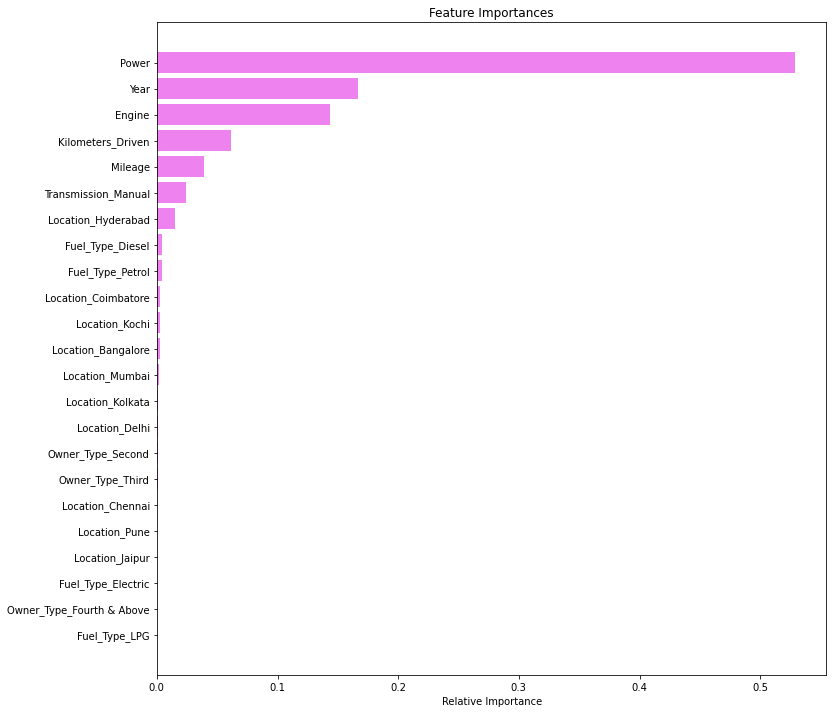

In [79]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Regressor

In [80]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.9957955532720888
R-square on test set :  0.9292124673610824
RMSE on training set :  0.7332194776012929
RMSE on test set :  2.8993660443383664


- XGBoost with default parameters is giving almost as good results as the tuned gradient boosting model.

### Hyperparameter Tuning

In [82]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=12, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-sqaure on training set :  0.9945154429258751
R-square on test set :  0.9122522038608134
RMSE on training set :  0.8374335313174861
RMSE on test set :  3.228068706867668


- XGBoost as good as the untunned one

In [84]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.234660
Engine                     0.160458
Transmission_Manual        0.107239
Year                       0.098532
Kilometers_Driven          0.057502
Fuel_Type_Petrol           0.047136
Mileage                    0.041448
Location_Kolkata           0.037897
Location_Mumbai            0.033136
Location_Hyderabad         0.030239
Fuel_Type_Diesel           0.026287
Location_Delhi             0.020609
Location_Coimbatore        0.017569
Location_Kochi             0.017387
Owner_Type_Third           0.017308
Location_Bangalore         0.013682
Location_Chennai           0.012588
Owner_Type_Second          0.008925
Location_Pune              0.006529
Fuel_Type_Electric         0.005172
Location_Jaipur            0.004599
Owner_Type_Fourth & Above  0.001099
Fuel_Type_LPG              0.000000


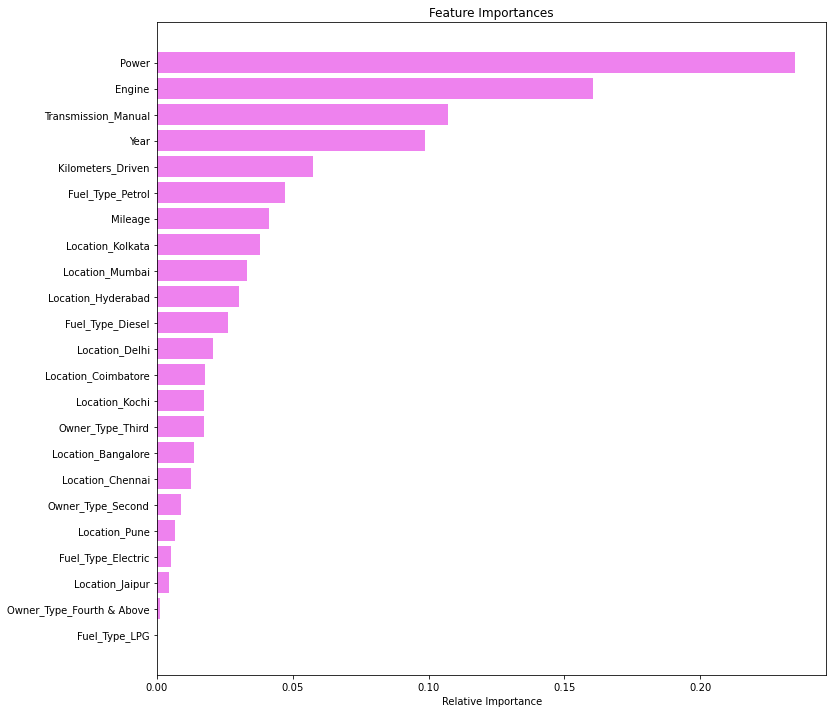

In [85]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Stacking Model

In [86]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [87]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)


StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=13,
                                                     min_samples_leaf=7,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features='sqrt',
                                                     n_estimators=120,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=5,
                                                         max_features=0.7,
                                                         n_estimators=175,
                                                         random_state=1,
                                                         subsample=0.8))],
                  final_estima...

In [88]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-sqaure on training set :  0.856275461629379
R-square on test set :  0.8970056510688456
RMSE on training set :  4.286916528798459
RMSE on test set :  3.4972876902327963


### Comparing all models

In [89]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, ab_regressor, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [90]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Regressor', 'Tuned AdaBoost Regressor',
                                          'Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor',
                                          'XGBoost Regressor',  'Tuned XGBoost Regressor','Stacking Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Decision Tree,0.999999,0.776707,0.011398,5.149463
1,Tuned Decision Tree,0.895174,0.854035,3.661125,4.163406
2,Random Forest,0.980916,0.921569,1.562136,3.051896
3,Tuned Random Forest,0.980210,0.907183,1.590760,3.320006
4,AdaBoost Regressor,0.780717,0.776558,5.295200,5.151186
5,Tuned AdaBoost Regressor,0.769944,0.789669,5.423710,4.997768
6,Gradient Boosting Regressor,0.929553,0.903579,3.001320,3.383850
7,Tuned Gradient Boosting Regressor,0.988241,0.932418,1.226225,2.832962
8,XGBoost Regressor,0.995796,0.929212,0.733219,2.899366
9,Tuned XGBoost Regressor,0.994515,0.912252,0.837434,3.228069


- Gradient Boosting Regressor has the best R2 and RMSE

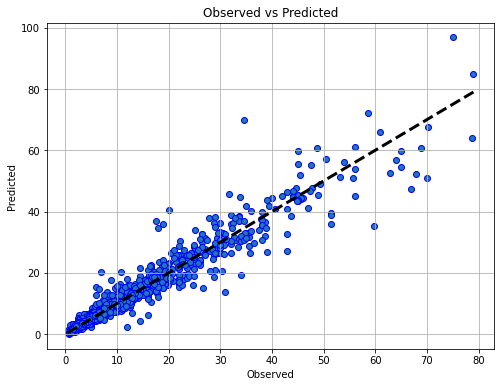

In [91]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot.